In [90]:
import pandas as pd
import numpy as np
import seaborn as sns

In [91]:
cc_df = pd.read_csv('data/fraud.csv')

In [92]:
pd.set_option('display.max_columns', 50)

In [93]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [94]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [95]:
cc_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


In [96]:
cc_df.loc[(cc_df['is_fraud'] == 0) & (cc_df['amt'] >= 150), 'amt'] = 150

## EDA

In [97]:
object_columns = cc_df.select_dtypes(include="object").columns

# 각 컬럼의 고유값 출력
for col in object_columns:
    unique_vals = cc_df[col].unique()
    print(f"=== {col} (고유값 {len(unique_vals)}개) ===")
    print(unique_vals[:50])  # 처음 50개만 표시
    print()

=== trans_date_trans_time (고유값 488474개) ===
['2019-01-01 00:00:44' '2019-01-01 00:12:34' '2019-01-01 00:17:16'
 '2019-01-01 00:20:15' '2019-01-01 00:23:41' '2019-01-01 00:26:22'
 '2019-01-01 00:27:45' '2019-01-01 00:30:49' '2019-01-01 00:31:51'
 '2019-01-01 00:34:10' '2019-01-01 00:41:45' '2019-01-01 00:44:43'
 '2019-01-01 00:45:13' '2019-01-01 00:50:53' '2019-01-01 00:55:05'
 '2019-01-01 01:00:48' '2019-01-01 01:01:48' '2019-01-01 01:02:53'
 '2019-01-01 01:08:31' '2019-01-01 01:09:57' '2019-01-01 01:14:11'
 '2019-01-01 01:32:28' '2019-01-01 01:34:25' '2019-01-01 01:37:06'
 '2019-01-01 01:45:21' '2019-01-01 01:46:08' '2019-01-01 01:47:09'
 '2019-01-01 01:49:37' '2019-01-01 01:50:26' '2019-01-01 01:59:23'
 '2019-01-01 02:13:16' '2019-01-01 02:20:32' '2019-01-01 02:20:56'
 '2019-01-01 02:26:14' '2019-01-01 02:29:25' '2019-01-01 02:32:26'
 '2019-01-01 02:33:06' '2019-01-01 02:36:30' '2019-01-01 02:42:12'
 '2019-01-01 02:49:55' '2019-01-01 02:50:00' '2019-01-01 02:51:32'
 '2019-01-01 03:00

In [98]:
# 이상치 처리를 위해 IQR 방법을 사용하여 수치형 컬럼의 이상치를 제거합니다.

# 수치형 컬럼만 선택
num_cols = cc_df.select_dtypes(include=np.number).columns

# 각 컬럼별로 IQR을 이용해 이상치 인덱스 추출
outlier_indices = set()
for col in num_cols:
    Q1 = cc_df[col].quantile(0.25)
    Q3 = cc_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = cc_df[(cc_df[col] < lower_bound) | (cc_df[col] > upper_bound)].index
    outlier_indices.update(outliers)

print(f"이상치로 판단된 행 개수: {len(outlier_indices)}")


이상치로 판단된 행 개수: 133019


In [99]:
# is_fraud 값이 0인 데이터프레임과 1인 데이터프레임으로 나누기
cc_df_0 = cc_df[cc_df['is_fraud'] == 0]
cc_df_1 = cc_df[cc_df['is_fraud'] == 1]



==== 사기거래 데이터 기본 통계량 ====


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,1244,1.244000e+03,1244,1244,1244.000000,1244,1244,1244,1244,1244,1244,1244.000000,1244.000000,1244.000000,1.244000e+03,1244,1244,1244,1.244000e+03,1244.000000,1244.000000,1244.0
unique,1244,NaN,497,14,NaN,92,100,2,122,119,44,NaN,NaN,NaN,NaN,108,121,1244,NaN,NaN,NaN,NaN
top,2019-01-12 00:59:01,NaN,"fraud_Moen, Reinger and Murphy",shopping_net,NaN,Kenneth,Lowe,F,444 Robert Mews,Birmingham,TX,NaN,NaN,NaN,NaN,Environmental consultant,1977-03-23,77c44b4cff9a624f54d389887605dbb2,NaN,NaN,NaN,NaN
freq,1,NaN,11,242,NaN,37,46,848,18,25,120,NaN,NaN,NaN,NaN,29,31,1,NaN,NaN,NaN,NaN
mean,NaN,3.802642e+17,NaN,NaN,477.958328,NaN,NaN,NaN,NaN,NaN,NaN,49169.089228,38.018846,-89.781168,7.976371e+04,NaN,NaN,NaN,1.355786e+09,38.027885,-89.794773,1.0
std,NaN,1.273204e+18,NaN,NaN,398.229485,NaN,NaN,NaN,NaN,NaN,NaN,26821.464413,5.328383,12.540186,2.592555e+05,NaN,NaN,NaN,1.823747e+07,5.337767,12.573992,0.0
min,NaN,5.038744e+11,NaN,NaN,6.380000,NaN,NaN,NaN,NaN,NaN,NaN,1843.000000,24.655700,-122.345600,4.600000e+01,NaN,NaN,NaN,1.326330e+09,23.722663,-123.130516,1.0
25%,NaN,2.131124e+14,NaN,NaN,22.895000,NaN,NaN,NaN,NaN,NaN,NaN,28253.750000,34.032600,-96.601200,8.950000e+02,NaN,NaN,NaN,1.338170e+09,34.057762,-96.518615,1.0
50%,NaN,3.527537e+15,NaN,NaN,334.750000,NaN,NaN,NaN,NaN,NaN,NaN,48174.000000,38.893800,-86.790400,4.542000e+03,NaN,NaN,NaN,1.356657e+09,38.756641,-87.271420,1.0
75%,NaN,4.642255e+15,NaN,NaN,865.385000,NaN,NaN,NaN,NaN,NaN,NaN,72165.000000,41.606000,-80.307000,3.423875e+04,NaN,NaN,NaN,1.371855e+09,41.728511,-80.511924,1.0



==== 사기거래 category 분포 ====
category
shopping_net      242
grocery_pos       216
shopping_pos      134
misc_net          109
gas_transport     101
home               72
kids_pets          68
food_dining        62
personal_care      58
misc_pos           57
entertainment      53
health_fitness     40
travel             24
grocery_net         8
Name: count, dtype: int64

==== 사기거래 merchant 상위 10개 ====
merchant
fraud_Moen, Reinger and Murphy           11
fraud_Gottlieb, Considine and Schultz     9
fraud_Kilback LLC                         9
fraud_Hudson-Ratke                        9
fraud_Langworth, Boehm and Gulgowski      9
fraud_Goldner, Kovacek and Abbott         9
fraud_Altenwerth, Cartwright and Koss     9
fraud_Wolf Inc                            9
fraud_Rau and Sons                        8
fraud_Bashirian Group                     8
Name: count, dtype: int64


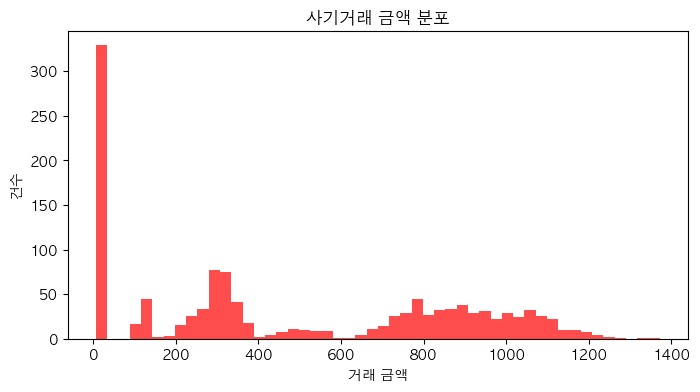

/var/folders/zq/z7nyx1kd14qdfcnvzpg7mcww0000gn/T/ipykernel_58584/3162812278.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_df_1['trans_date_trans_time'] = pd.to_datetime(cc_df_1['trans_date_trans_time'])
/var/folders/zq/z7nyx1kd14qdfcnvzpg7mcww0000gn/T/ipykernel_58584/3162812278.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_df_1['hour'] = cc_df_1['trans_date_trans_time'].dt.hour


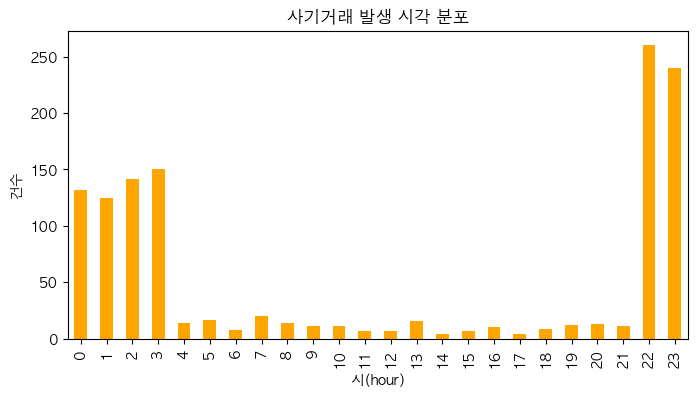


==== 사기거래 job 상위 10개 ====
job
Environmental consultant                             29
Surveyor, land/geomatics                             28
Comptroller                                          26
Immunologist                                         25
Historic buildings inspector/conservation officer    24
Paramedic                                            21
Exhibition designer                                  20
Film/video editor                                    19
Television production assistant                      19
Chief Executive Officer                              19
Name: count, dtype: int64


In [100]:
# cc_df_1의 데이터(사기거래 데이터)를 다양한 관점에서 살펴보자.
# 한글 폰트 깨짐 현상 해결 (Mac용)
import matplotlib.pyplot as plt
import matplotlib as mpl

# 맥에서 한글 폰트 설정 (예: AppleGothic)
mpl.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# 1. 사기거래의 기본 통계량 확인
print("==== 사기거래 데이터 기본 통계량 ====")
display(cc_df_1.describe(include='all'))

# 2. 사기거래의 카테고리별 분포 확인
print("\n==== 사기거래 category 분포 ====")
print(cc_df_1['category'].value_counts())

# 3. 사기거래의 merchant(가맹점) 상위 10개 확인
print("\n==== 사기거래 merchant 상위 10개 ====")
print(cc_df_1['merchant'].value_counts().head(10))

# 4. 사기거래의 거래 금액 분포 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.hist(cc_df_1['amt'], bins=50, color='red', alpha=0.7)
plt.title('사기거래 금액 분포')
plt.xlabel('거래 금액')
plt.ylabel('건수')
plt.show()

# 5. 사기거래의 시간대(시각) 분포 확인
cc_df_1['trans_date_trans_time'] = pd.to_datetime(cc_df_1['trans_date_trans_time'])
cc_df_1['hour'] = cc_df_1['trans_date_trans_time'].dt.hour
plt.figure(figsize=(8,4))
cc_df_1['hour'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('사기거래 발생 시각 분포')
plt.xlabel('시(hour)')
plt.ylabel('건수')
plt.show()

# 6. 사기거래의 직업별 분포 확인
print("\n==== 사기거래 job 상위 10개 ====")
print(cc_df_1['job'].value_counts().head(10))


==== 정상거래 데이터 기본 통계량 ====


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,489890,4.898900e+05,489890,489890,489890.000000,489890,489890,489890,489890,489890,489890,489890.000000,489890.000000,489890.000000,4.898900e+05,489890,489890,489890,4.898900e+05,489890.000000,489890.000000,489890.0
unique,487241,NaN,693,14,NaN,92,102,2,124,121,44,NaN,NaN,NaN,NaN,110,123,489890,NaN,NaN,NaN,NaN
top,2019-12-26 17:21:34,NaN,fraud_Kilback LLC,shopping_pos,NaN,Margaret,Lowe,F,899 Michele View Suite 960,Birmingham,TX,NaN,NaN,NaN,NaN,Environmental consultant,1977-03-23,1f76529f8574734946361c461b024d99,NaN,NaN,NaN,NaN
freq,3,NaN,1593,48211,NaN,16000,16010,351597,4380,8004,49501,NaN,NaN,NaN,NaN,8748,8013,1,NaN,NaN,NaN,NaN
mean,NaN,3.705768e+17,NaN,NaN,52.965739,NaN,NaN,NaN,NaN,NaN,NaN,50774.599002,37.931007,-90.497433,1.214979e+05,NaN,NaN,NaN,1.358738e+09,37.930024,-90.497190,0.0
std,NaN,1.260197e+18,NaN,NaN,47.794176,NaN,NaN,NaN,NaN,NaN,NaN,26854.938719,5.341229,12.991819,3.728133e+05,NaN,NaN,NaN,1.819332e+07,5.373078,13.005139,0.0
min,NaN,5.038744e+11,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1843.000000,24.655700,-122.345600,4.600000e+01,NaN,NaN,NaN,1.325376e+09,23.655789,-123.345106,0.0
25%,NaN,2.131124e+14,NaN,NaN,8.950000,NaN,NaN,NaN,NaN,NaN,NaN,28405.000000,33.746700,-97.235100,1.228000e+03,NaN,NaN,NaN,1.343104e+09,33.780872,-96.985554,0.0
50%,NaN,3.531130e+15,NaN,NaN,42.080000,NaN,NaN,NaN,NaN,NaN,NaN,49628.000000,38.507200,-87.591700,5.760000e+03,NaN,NaN,NaN,1.357258e+09,38.544135,-87.574118,0.0
75%,NaN,4.653879e+15,NaN,NaN,80.060000,NaN,NaN,NaN,NaN,NaN,NaN,75048.000000,41.520500,-80.731000,5.083500e+04,NaN,NaN,NaN,1.374638e+09,41.624159,-80.685961,0.0



==== 정상거래 category 분포 ====
category
shopping_pos      48211
gas_transport     45928
home              43268
grocery_pos       42506
kids_pets         40227
shopping_net      38937
food_dining       35918
personal_care     35455
entertainment     33566
misc_pos          32354
health_fitness    31375
misc_net          25070
grocery_net       24478
travel            12597
Name: count, dtype: int64

==== 정상거래 merchant 상위 10개 ====
merchant
fraud_Kilback LLC                       1593
fraud_Cormier LLC                       1451
fraud_Kuhn LLC                          1439
fraud_Schumm PLC                        1387
fraud_Boyer PLC                         1368
fraud_Dickinson Ltd                     1341
fraud_Hickle Group                      1024
fraud_Baumbach, Hodkiewicz and Walsh    1012
fraud_Willms, Kris and Bergnaum         1005
fraud_Stoltenberg-Beatty                 997
Name: count, dtype: int64


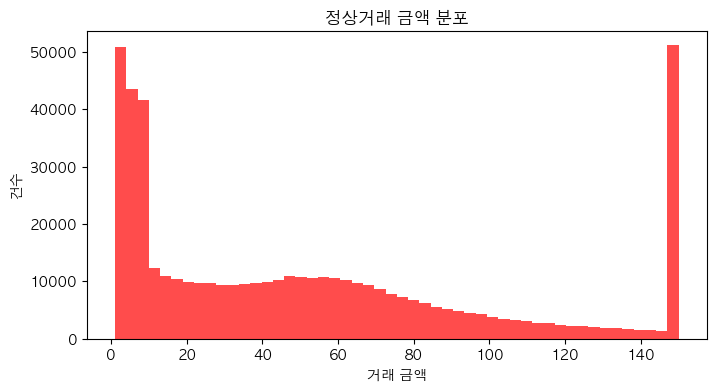

/var/folders/zq/z7nyx1kd14qdfcnvzpg7mcww0000gn/T/ipykernel_58584/3214681963.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_df_0['trans_date_trans_time'] = pd.to_datetime(cc_df_0['trans_date_trans_time'])
/var/folders/zq/z7nyx1kd14qdfcnvzpg7mcww0000gn/T/ipykernel_58584/3214681963.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_df_0['hour'] = cc_df_0['trans_date_trans_time'].dt.hour


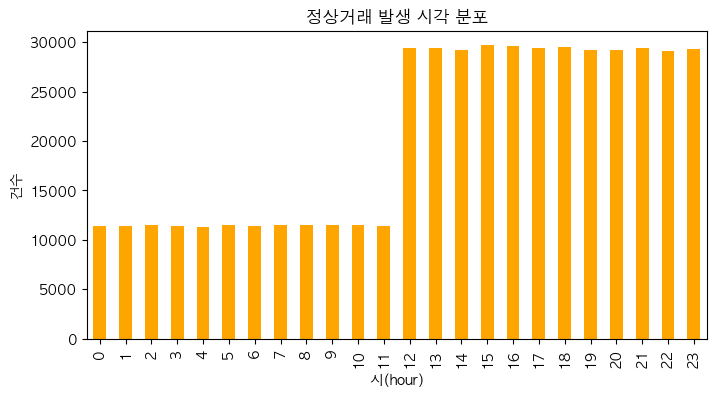


==== 정상거래 job 상위 10개 ====
job
Environmental consultant    8748
Comptroller                 8740
Immunologist                8735
Water engineer              8727
Film/video editor           8016
Firefighter                 8008
Materials engineer          8007
Chief Executive Officer     7988
Musician                    7287
Exhibition designer         7285
Name: count, dtype: int64


In [101]:
# cc_df_0의 데이터(정상거래 데이터)를 다양한 관점에서 살펴보자.
# 한글 폰트 깨짐 현상 해결 (Mac용)
import matplotlib.pyplot as plt
import matplotlib as mpl

# 맥에서 한글 폰트 설정 (예: AppleGothic)
mpl.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# 1. 정상거래의 기본 통계량 확인
print("==== 정상거래 데이터 기본 통계량 ====")
display(cc_df_0.describe(include='all'))

# 2. 정상거래의 카테고리별 분포 확인
print("\n==== 정상거래 category 분포 ====")
print(cc_df_0['category'].value_counts())

# 3. 정상거래의 merchant(가맹점) 상위 10개 확인
print("\n==== 정상거래 merchant 상위 10개 ====")
print(cc_df_0['merchant'].value_counts().head(10))

# 4. 정상거래의 거래 금액 분포 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.hist(cc_df_0['amt'], bins=50, color='red', alpha=0.7)
plt.title('정상거래 금액 분포')
plt.xlabel('거래 금액')
plt.ylabel('건수')
plt.show()

# 5. 정상거래의 시간대(시각) 분포 확인
cc_df_0['trans_date_trans_time'] = pd.to_datetime(cc_df_0['trans_date_trans_time'])
cc_df_0['hour'] = cc_df_0['trans_date_trans_time'].dt.hour
plt.figure(figsize=(8,4))
cc_df_0['hour'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('정상거래 발생 시각 분포')
plt.xlabel('시(hour)')
plt.ylabel('건수')
plt.show()

# 6. 정상거래의 직업별 분포 확인
print("\n==== 정상거래 job 상위 10개 ====")
print(cc_df_0['job'].value_counts().head(10))


In [102]:
cc_df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [103]:
# cc_df_1에서 고객 위치(위도, 경도)와 가맹점 위치(위도, 경도) 비교
# cc_df_1의 category 컬럼에서 '_pos'로 끝나는 값들만 필터링
cc_df_1_pos = cc_df_1[cc_df_1['category'].str.endswith('_pos')]

# 위도, 경도 컬럼명: 고객(lat, long), 가맹점(merch_lat, merch_long)
# 1. 일치 여부(소수점 4자리까지) 확인
lat_equal_pos = (cc_df_1_pos['lat'].round(4) == cc_df_1_pos['merch_lat'].round(4))
long_equal_pos = (cc_df_1_pos['long'].round(4) == cc_df_1_pos['merch_long'].round(4))

print("(_pos) 고객 위치와 가맹점 위치(위도, 경도)가 완전히 일치하는 거래 수:", ((lat_equal_pos) & (long_equal_pos)).sum())
print("(_pos) 고객 위치와 가맹점 위치(위도, 경도)가 일치하지 않는 거래 수:", ((~lat_equal_pos) | (~long_equal_pos)).sum())

# 2. 오차값 계산 (절대값)
cc_df_1_pos['lat_diff'] = (cc_df_1_pos['lat'] - cc_df_1_pos['merch_lat']).abs()
cc_df_1_pos['long_diff'] = (cc_df_1_pos['long'] - cc_df_1_pos['merch_long']).abs()

print("\n(_pos) 위도 오차값 통계:")
print(cc_df_1_pos['lat_diff'].describe())
print("\n(_pos) 경도 오차값 통계:")
print(cc_df_1_pos['long_diff'].describe())

# 3. 기기 인식상 오차범위(예: 0.01도 이내) 내외 비율
lat_in_tolerance_pos = cc_df_1_pos['lat_diff'] <= 0.01
long_in_tolerance_pos = cc_df_1_pos['long_diff'] <= 0.01
in_tolerance_pos = lat_in_tolerance_pos & long_in_tolerance_pos

print("\n(_pos) 기기 인식상 오차범위(0.01도) 이내 거래 수:", in_tolerance_pos.sum())
print("(_pos) 전체 거래 대비 비율: {:.2f}%".format(in_tolerance_pos.mean() * 100))
print("(_pos) 오차범위 밖 거래 수:", (~in_tolerance_pos).sum())


(_pos) 고객 위치와 가맹점 위치(위도, 경도)가 완전히 일치하는 거래 수: 0
(_pos) 고객 위치와 가맹점 위치(위도, 경도)가 일치하지 않는 거래 수: 407

(_pos) 위도 오차값 통계:
count    407.000000
mean       0.498231
std        0.283837
min        0.000334
25%        0.265566
50%        0.494286
75%        0.735567
max        0.996476
Name: lat_diff, dtype: float64

(_pos) 경도 오차값 통계:
count    407.000000
mean       0.496369
std        0.284124
min        0.000725
25%        0.245962
50%        0.492365
75%        0.736776
max        0.995306
Name: long_diff, dtype: float64

(_pos) 기기 인식상 오차범위(0.01도) 이내 거래 수: 0
(_pos) 전체 거래 대비 비율: 0.00%
(_pos) 오차범위 밖 거래 수: 407


/var/folders/zq/z7nyx1kd14qdfcnvzpg7mcww0000gn/T/ipykernel_58584/1204654018.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_df_1_pos['lat_diff'] = (cc_df_1_pos['lat'] - cc_df_1_pos['merch_lat']).abs()
/var/folders/zq/z7nyx1kd14qdfcnvzpg7mcww0000gn/T/ipykernel_58584/1204654018.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_df_1_pos['long_diff'] = (cc_df_1_pos['long'] - cc_df_1_pos['merch_long']).abs()


In [104]:
# cc_df_0에서 고객 위치(위도, 경도)와 가맹점 위치(위도, 경도) 비교
# cc_df_0의 category 컬럼에서 '_pos'로 끝나는 값들만 필터링
cc_df_0_pos = cc_df_0[cc_df_0['category'].str.endswith('_pos')]

# 위도, 경도 컬럼명: 고객(lat, long), 가맹점(merch_lat, merch_long)
# 1. 일치 여부(소수점 4자리까지) 확인
lat_equal_pos = (cc_df_0_pos['lat'].round(4) == cc_df_0_pos['merch_lat'].round(4))
long_equal_pos = (cc_df_0_pos['long'].round(4) == cc_df_0_pos['merch_long'].round(4))

print("(_pos) 고객 위치와 가맹점 위치(위도, 경도)가 완전히 일치하는 거래 수:", ((lat_equal_pos) & (long_equal_pos)).sum())
print("(_pos) 고객 위치와 가맹점 위치(위도, 경도)가 일치하지 않는 거래 수:", ((~lat_equal_pos) | (~long_equal_pos)).sum())

# 2. 오차값 계산 (절대값)
cc_df_0_pos['lat_diff'] = (cc_df_0_pos['lat'] - cc_df_0_pos['merch_lat']).abs()
cc_df_0_pos['long_diff'] = (cc_df_0_pos['long'] - cc_df_0_pos['merch_long']).abs()

print("\n(_pos) 위도 오차값 통계:")
print(cc_df_0_pos['lat_diff'].describe())
print("\n(_pos) 경도 오차값 통계:")
print(cc_df_0_pos['long_diff'].describe())

# 3. 기기 인식상 오차범위(예: 0.01도 이내) 내외 비율
lat_in_tolerance_pos = cc_df_0_pos['lat_diff'] <= 0.02
long_in_tolerance_pos = cc_df_0_pos['long_diff'] <= 0.02
in_tolerance_pos = lat_in_tolerance_pos & long_in_tolerance_pos

print("\n(_pos) 기기 인식상 오차범위(0.01도) 이내 거래 수:", in_tolerance_pos.sum())
print("(_pos) 전체 거래 대비 비율: {:.2f}%".format(in_tolerance_pos.mean() * 100))
print("(_pos) 오차범위 밖 거래 수:", (~in_tolerance_pos).sum())


(_pos) 고객 위치와 가맹점 위치(위도, 경도)가 완전히 일치하는 거래 수: 0
(_pos) 고객 위치와 가맹점 위치(위도, 경도)가 일치하지 않는 거래 수: 123071

(_pos) 위도 오차값 통계:
count    123071.000000
mean          0.501352
std           0.288454
min           0.000002
25%           0.252349
50%           0.503356
75%           0.751437
max           0.999998
Name: lat_diff, dtype: float64

(_pos) 경도 오차값 통계:
count    123071.000000
mean          0.499238
std           0.288877
min           0.000004
25%           0.248195
50%           0.498372
75%           0.748927
max           0.999984
Name: long_diff, dtype: float64

(_pos) 기기 인식상 오차범위(0.01도) 이내 거래 수: 50
(_pos) 전체 거래 대비 비율: 0.04%
(_pos) 오차범위 밖 거래 수: 123021


/var/folders/zq/z7nyx1kd14qdfcnvzpg7mcww0000gn/T/ipykernel_58584/1809614592.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_df_0_pos['lat_diff'] = (cc_df_0_pos['lat'] - cc_df_0_pos['merch_lat']).abs()
/var/folders/zq/z7nyx1kd14qdfcnvzpg7mcww0000gn/T/ipykernel_58584/1809614592.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_df_0_pos['long_diff'] = (cc_df_0_pos['long'] - cc_df_0_pos['merch_long']).abs()


## Project

In [105]:
# 'trans_date_trans_time' 컬럼을 datetime 타입으로 변환
cc_df['trans_date_trans_time'] = pd.to_datetime(cc_df['trans_date_trans_time'])

# 날짜와 시간을 각각 새로운 컬럼으로 분리
cc_df['trans_date'] = cc_df['trans_date_trans_time'].dt.date
cc_df['trans_time'] = cc_df['trans_date_trans_time'].dt.time

In [106]:
cc_df = cc_df.drop(['trans_date_trans_time'], axis=1)

In [107]:
cc_df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44
1,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,2019-01-01,00:12:34
2,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,2019-01-01,00:17:16
3,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,2019-01-01,00:20:15
4,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,2019-01-01,00:23:41


In [108]:
# is_fraud 값이 0인 데이터프레임과 1인 데이터프레임을 각각 생성
cc_df_0 = cc_df[cc_df['is_fraud'] == 0]
cc_df_1 = cc_df[cc_df['is_fraud'] == 1]

/var/folders/zq/z7nyx1kd14qdfcnvzpg7mcww0000gn/T/ipykernel_58584/3026800280.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_df_1['hour'] = cc_df_1['trans_time'].apply(lambda x: x.hour)
/var/folders/zq/z7nyx1kd14qdfcnvzpg7mcww0000gn/T/ipykernel_58584/3026800280.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_df_1['category_encoded'] = le.fit_transform(cc_df_1['category'])


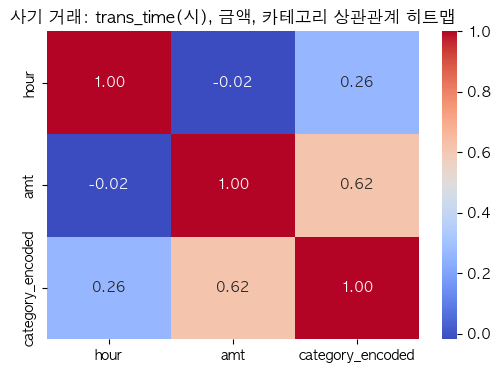

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# trans_time을 시/분/초로 변환하여 시(hour)만 추출
cc_df_1['hour'] = cc_df_1['trans_time'].apply(lambda x: x.hour)

# 카테고리를 숫자로 변환
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cc_df_1['category_encoded'] = le.fit_transform(cc_df_1['category'])

# 상관관계 분석을 위한 데이터프레임 생성
corr_df = cc_df_1[['hour', 'amt', 'category_encoded']]

# 상관관계 행렬 계산
corr_matrix = corr_df.corr()

# 히트맵 시각화
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('사기 거래: trans_time(시), 금액, 카테고리 상관관계 히트맵')
plt.show()


In [110]:
# 사기 거래의 merchant와 category를 함께 저장 (튜플 리스트 형태)
fraud_merchants_with_category = cc_df_1[['merchant', 'category']].drop_duplicates().values.tolist()
fraud_merchants_with_category

[['fraud_Zieme, Bode and Dooley', 'gas_transport'],
 ['fraud_Koepp-Witting', 'grocery_pos'],
 ['fraud_Abernathy and Sons', 'food_dining'],
 ['fraud_Boyer-Reichert', 'shopping_net'],
 ['fraud_Fisher-Schowalter', 'shopping_net'],
 ['fraud_Hermann and Sons', 'shopping_pos'],
 ['fraud_Gleason-Macejkovic', 'shopping_net'],
 ['fraud_Schaefer Ltd', 'kids_pets'],
 ['fraud_Volkman-Predovic', 'shopping_net'],
 ['fraud_Rempel Inc', 'shopping_net'],
 ['fraud_Kris-Padberg', 'shopping_pos'],
 ['fraud_Barton LLC', 'kids_pets'],
 ['fraud_Brown Inc', 'kids_pets'],
 ['fraud_Schoen-Quigley', 'kids_pets'],
 ['fraud_Durgan, Gislason and Spencer', 'home'],
 ['fraud_Kuphal-Bartoletti', 'misc_net'],
 ['fraud_Goldner, Kovacek and Abbott', 'grocery_pos'],
 ['fraud_Eichmann-Russel', 'misc_pos'],
 ['fraud_Jones, Sawayn and Romaguera', 'misc_net'],
 ['fraud_Ferry, Lynch and Kautzer', 'misc_net'],
 ['fraud_Barrows PLC', 'shopping_pos'],
 ['fraud_Spencer PLC', 'entertainment'],
 ['fraud_Erdman-Kertzmann', 'gas_trans

/var/folders/zq/z7nyx1kd14qdfcnvzpg7mcww0000gn/T/ipykernel_58584/1860003578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_df_0['hour'] = cc_df_0['trans_time'].apply(lambda x: x.hour)
/var/folders/zq/z7nyx1kd14qdfcnvzpg7mcww0000gn/T/ipykernel_58584/1860003578.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_df_0['category_encoded'] = le.fit_transform(cc_df_0['category'])


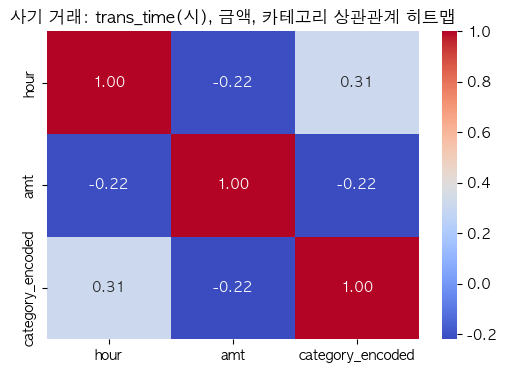

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# trans_time을 시/분/초로 변환하여 시(hour)만 추출
cc_df_0['hour'] = cc_df_0['trans_time'].apply(lambda x: x.hour)

# 카테고리를 숫자로 변환
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cc_df_0['category_encoded'] = le.fit_transform(cc_df_0['category'])

# 상관관계 분석을 위한 데이터프레임 생성
corr_df = cc_df_0[['hour', 'amt', 'category_encoded']]

# 상관관계 행렬 계산
corr_matrix = corr_df.corr()

# 히트맵 시각화
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('사기 거래: trans_time(시), 금액, 카테고리 상관관계 히트맵')
plt.show()


In [112]:
# 새로운 피처 1: 거래 금액이 해당 카드의 평균 거래 금액보다 얼마나 벗어났는지 (z-score)
cc_df['amt_mean'] = cc_df.groupby('cc_num')['amt'].transform('mean')
cc_df['amt_std'] = cc_df.groupby('cc_num')['amt'].transform('std')
cc_df['amt_zscore'] = (cc_df['amt'] - cc_df['amt_mean']) / cc_df['amt_std']

# 새로운 피처 2: 거래 위치와 카드 소유자의 거리 (위도/경도 차이의 유클리드 거리)
import numpy as np
cc_df['geo_dist'] = np.sqrt((cc_df['lat'] - cc_df['merch_lat'])**2 + (cc_df['long'] - cc_df['merch_long'])**2)

# 새로운 피처 3: 해당 카드의 하루 거래 횟수
cc_df['daily_trans_count'] = cc_df.groupby(['cc_num', 'trans_date'])['trans_num'].transform('count')

# 불필요한 중간 피처 제거
cc_df.drop(['amt_mean', 'amt_std'], axis=1, inplace=True)



In [115]:
cc_df = cc_df.drop(['trans_num', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'lat', 'long', 'unix_time','gender', 'city_pop', 'job', 'merch_lat', 'merch_long'], axis=1)

In [116]:
cc_df

,merchant,category,amt,is_fraud,trans_date,trans_time,amt_zscore,geo_dist,daily_trans_count
0,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,0,2019-01-01,00:00:44,1.374892,0.272310,10
1,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,0,2019-01-01,00:12:34,-0.053668,0.862420,2
2,fraud_Kling-Grant,grocery_net,46.28,0,2019-01-01,00:17:16,-0.370628,0.622027,4
3,fraud_Deckow-O'Conner,grocery_pos,64.09,0,2019-01-01,00:20:15,0.301153,0.239327,5
4,fraud_Balistreri-Nader,misc_pos,25.58,0,2019-01-01,00:23:41,-0.768685,0.730752,5
...,...,...,...,...,...,...,...,...,...
491129,fraud_Botsford and Sons,home,134.26,0,2020-12-31,23:56:48,1.298422,0.990794,7
491130,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,0,2020-12-31,23:56:57,-0.403465,1.217523,15
491131,fraud_Hoppe-Parisian,kids_pets,111.84,0,2020-12-31,23:59:09,1.229751,0.971537,9
491132,fraud_Rau-Robel,kids_pets,86.88,0,2020-12-31,23:59:15,0.342872,0.935280,9


### 가설 1 : 고객의 위치와 가맹점의 위치 차이가 오차범위 내에 있을 경우 정상 거래일 것이다.(오프라인 결제건의 경우)
-> 데이터에서 주어진 위/경도가 사용자의 거래시점 위/경도인지 거주지의 위/경도인지 알 수 없으며 데이터 처리 결과 GPS 오차 범위를 1km로 잡아도 범위 내에 위치하는 경우가 거의 없어 해당 분석은 실패. 위/경도를 사용하는 분석은 지역/도시의 사기 거래 발생 비율과 같은 분석으로 활용 가능할 것으로 예상됨

### 가설 2 : 평균 거래 금액보다 금액이 큰 경우 사기 거래일 가능성이 높다
-> 평균 거래 금액보다 금액이 큰 경우가 좀 애매함. 평균적으로 거래 금액이 큰 카테고리의 경우 travel(여행)과 같은 큰 지출이 예상되는 항목일 가능성이 높음. 그래서 카테고리 범위를 축소 및 제한하여 거래 금액 비교 분석을 진행하면 유의미한 결과를 얻을 수 있을 것으로 예상됨

### 가설 3 : 해당 카드의 하루 거래 건수가 비정상적으로 많을 경우 사기 거래일 가능성이 높다.
-> 평균적으로 카드의 거래 건수는 크게 다르지 않음. 보통 사용처가 명확하기 때문에. 하지만 예외의 경우로 여행용 카드, 식료품 카드 등 명확하게 용도를 분리하여 사용하는 카드의 경우를 들 수 있음. 하여 하루 거래 건수가 비정상적으로 많으며 카드 결제 시간과 비교하여 짧은 시간 내에 반복적인 카드 결제는 사기 거래일 가능성이 높음